# Abgabe 1 - Gruppenprojekt 13

### Fragestellung

## 1. Fragestellung entwicklen und daten aufbereiten

#### Als Fragestellung haben wir uns entschieden für:

#### -Wie beeinflussen verschiedene Faktoren wie Alter, Artikel,  Saison die Kaufentscheidungen von Kunden?

lhiuuhi

### Hypothesen
Weibliche Kunden zeigen eine höhere Präferenz für Kleidungskäufe im Vergleich zu männlichen Kunden.
Kunden, die von Aktionsrabatten profitieren, geben tendenziell mehr aus als Kunden, die keine Rabatte erhalten.
Kunden mit Abonnentenstatus kaufen häufiger ein als Kunden ohne Abonnentenstatus.
- Ältere Kunden geben tendenziell mehr Geld aus als jüngere Kunden.
- Kunden, die in wärmeren Jahreszeiten kaufen, geben im Durchschnitt weniger aus als Kunden, die in kälteren Jahreszeiten kaufen.

#### Hier sind unsere Hypothesen: 
#### 


In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

## Daten laden

In [55]:
FILENAME_DATASET = "data_customers_shopping.csv"
df = pd.read_csv(FILENAME_DATASET, encoding="utf-8", header=0)
df


,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmountUSD,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyofPurchases
0,1.0,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2.0,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,6.0,46,Male,Sneakers,Footwear,20.0,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
3,7.0,63,Male,Shirt,Clothing,85.0,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
4,8.0,27,Male,Shorts,Clothing,34.0,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,3881.0,42,Female,Shirt,Clothing,20.0,Massachusetts,M,Red,Winter,3.9,No,Free Shipping,No,No,40,PayPal,Monthly
1282,3882.0,56,Female,Scarf,Accessories,25.0,Georgia,L,Silver,Spring,2.8,No,2-Day Shipping,No,No,17,Debit Card,Weekly
1283,3888.0,40,Female,Shirt,Clothing,34.0,Kansas,M,Charcoal,Spring,2.7,No,Express,No,No,1,Credit Card,Quarterly
1284,3892.0,36,Female,Dress,Clothing,30.0,Colorado,L,Peach,Winter,4.7,No,Free Shipping,No,No,6,Bank Transfer,Quarterly


> **Labele anpassen**

In [56]:
map_old_new_column_names = {"CustomerID": "customerID",
                            "Age": "age",
                            "Gender": "gender",
                            "ItemPurchased": "item_purchased",
                            "Category": "category",
                            "PurchaseAmountUSD": "purchase_amountUSD",
                            "Location": "location",
                            "Size": "size",
                            "Color": "color",
                            "Season": "season",
                            "ReviewRating": "review_rating",
                            "SubscriptionStatus": "subscription_status",
                           "ShippingType": "shipping_type",
                            "DiscountApplied": "discount_applied",
                            "PromoCodeUsed": "promo_code_used",
                            "PreviousPurchases": "previous_purchases",
                            "PaymentMethod": "payment_method",
                            "FrequencyofPurchases": "frequency_of_purchases"
                            }

print(map_old_new_column_names)

df.rename(columns=map_old_new_column_names, inplace=True)
df.columns

{'CustomerID': 'customerID', 'Age': 'age', 'Gender': 'gender', 'ItemPurchased': 'item_purchased', 'Category': 'category', 'PurchaseAmountUSD': 'purchase_amountUSD', 'Location': 'location', 'Size': 'size', 'Color': 'color', 'Season': 'season', 'ReviewRating': 'review_rating', 'SubscriptionStatus': 'subscription_status', 'ShippingType': 'shipping_type', 'DiscountApplied': 'discount_applied', 'PromoCodeUsed': 'promo_code_used', 'PreviousPurchases': 'previous_purchases', 'PaymentMethod': 'payment_method', 'FrequencyofPurchases': 'frequency_of_purchases'}


Index(['customerID', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amountUSD', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [57]:
#Alle Spalten-Strings in Kleinbuchstaben umwandeln
df["gender"] = df["gender"].str.lower()
df["item_purchased"] = df["item_purchased"].str.lower()
df["category"] = df["category"].str.lower()
df["location"] = df["location"].str.lower()
df["color"] = df["color"].str.lower()
df["season"] = df["season"].str.lower()
df["subscription_status"] = df["subscription_status"].str.lower()
df["shipping_type"] = df["shipping_type"].str.lower()
df["discount_applied"] = df["discount_applied"].str.lower()
df["promo_code_used"] = df["promo_code_used"].str.lower()
df["payment_method"] = df["payment_method"].str.lower()
df["frequency_of_purchases"] = df["frequency_of_purchases"].str.lower()

In [58]:
#erlaubt uns die Dimension der Tabelle zu wissen, beziehungsweise die Anzahl von Zeile und Spalten
df.shape

(1286, 18)

In [59]:
#Um alle information über die Datensatz anzuzeigen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              1281 non-null   float64
 1   age                     1286 non-null   int64  
 2   gender                  1286 non-null   object 
 3   item_purchased          1286 non-null   object 
 4   category                1286 non-null   object 
 5   purchase_amountUSD      1281 non-null   float64
 6   location                1279 non-null   object 
 7   size                    1286 non-null   object 
 8   color                   1286 non-null   object 
 9   season                  1286 non-null   object 
 10  review_rating           1286 non-null   float64
 11  subscription_status     1286 non-null   object 
 12  shipping_type           1286 non-null   object 
 13  discount_applied        1286 non-null   object 
 14  promo_code_used         1286 non-null   

### Anzahl von Zeilen und Spalten

In [60]:
nZeilen = df.shape[0]
nSpalten = df.shape[1]
print("anzahl Zeilen: ", nZeilen)
print("anzahl Spalten: ", nSpalten)

if nZeilen == 1286 and nSpalten == 18:
    print ("alles okay.")
else:
    print ("Fehler: Der Datensatz hat nicht die erwartete Anzahl an zeilen oder Spalten")

anzahl Zeilen:  1286
anzahl Spalten:  18
alles okay.


In [61]:
## 1erste bermerkung datentyp von costumer Id ändern float in Interger
## es stimmt nicht mit unsere Daten

### Zählung der fehlende Werte

#### wir zählen die Anzahl der Fehlende Werte Pro Variable

In [62]:
# Überprüfung auf fehlende Werte
df.isnull().sum()

customerID                5
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amountUSD        5
location                  7
size                      0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
promo_code_used           0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
dtype: int64

In [63]:
# Relativer Anteil der Fehlwerte je Spalte
df.isnull().sum() / len(df) * 100

customerID                0.388802
age                       0.000000
gender                    0.000000
item_purchased            0.000000
category                  0.000000
purchase_amountUSD        0.388802
location                  0.544323
size                      0.000000
color                     0.000000
season                    0.000000
review_rating             0.000000
subscription_status       0.000000
shipping_type             0.000000
discount_applied          0.000000
promo_code_used           0.000000
previous_purchases        0.000000
payment_method            0.000000
frequency_of_purchases    0.000000
dtype: float64

Die meisten Variablen haben keine Fehlwerte. Lediglich für die Variablen `CustomerID`, `Location` und `PurchaseAmountUSD` gibt es jeweils zwei Fehlwerte, was 13 % der Daten entspricht.

# **Bereinigung des Datensatzes**

## Fehlwerte entfernen

## **Fehlwerte imputieren**

### Prüfe und Bereinigung der Spalte purchase_amountUSD

In [64]:
# Prüfe das amount auf valide Werte
amount = "purchase_amountUSD"

if df[amount].dropna().between(1, 500).all():
    print(f"Info: Alles in Ordnung für '{amount}'")
else:
      print(f"Warnung: Ungültige Werte für '{amount}' gefunden")

Warnung: Ungültige Werte für 'purchase_amountUSD' gefunden


In [65]:
purchase_amountUSD_median = df["purchase_amountUSD"].median()

# Ersetzen der fehlenden Werte von PurchaseAmountUSD durch den Median
df['purchase_amountUSD'] = df['purchase_amountUSD'].fillna(purchase_amountUSD_median)

# Anzeigen des neuen DataFrame mit den ersetzten fehlenden Werten
df.iloc[100:106]


,customerID,age,gender,item_purchased,category,purchase_amountUSD,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
100,297.0,25,male,sandals,footwear,74.0,indiana,S,lavender,spring,4.8,yes,2-day shipping,yes,yes,19,credit card,weekly
101,300.0,25,male,sneakers,footwear,80.0,pennsylvania,M,maroon,summer,3.2,yes,next day air,yes,yes,28,paypal,fortnightly
102,301.0,29,male,hat,accessories,98.0,iowa,M,teal,spring,4.4,yes,store pickup,yes,yes,24,paypal,weekly
103,303.0,37,male,sweater,clothing,59.0,delaware,L,olive,summer,3.6,yes,express,yes,yes,27,bank transfer,every 3 months
104,304.0,20,male,sandals,footwear,60.0,oregon,M,turquoise,summer,3.3,yes,next day air,yes,yes,49,venmo,weekly
105,313.0,38,male,pants,clothing,89.0,massachusetts,L,green,spring,3.4,yes,next day air,yes,yes,6,paypal,annually


In [66]:
# Wählen Sie die Werte aus der Spalte 'PurchaseAmountUSD' aus, die nicht zwischen 1 und 1500 liegen
invalid_values = df[(df[amount].isnull()) | (~df[amount].between(1, 1500))][amount]

# Anzeigen der ungültigen Werte
print("Ungültige Werte für 'purchase_amountUSD':")
print(invalid_values)

Ungültige Werte für 'purchase_amountUSD':
22     -821.0
53     -761.0
319    -334.0
401    -401.0
816    -163.0
842    -993.0
866    -174.0
904    -830.0
905    -511.0
1096   -916.0
1244   -751.0
1269   -104.0
Name: purchase_amountUSD, dtype: float64


In [67]:
# fehlerhafte Werte das Alter bereinigen
#df["PurchaseAmountUSD"].replace(
#    {
#        -821: 821,
#        -761: 761,
#        -334: 334,
#        -401: 401,
#        -163: 163,
#       -993: 993,
#        -174: 174,
#       -830: 830,
#        -511: 511,
#       -916: 916,
#        -751: 751,
#        -104: 104,
#    },
#    inplace=True,
#)
df['purchase_amountUSD'] = df['purchase_amountUSD'].apply(lambda x :abs(x))
# Prüfe das Alter auf valide Werte
if df[amount].dropna().between(1, 1000).all():
    print(f"Info: Alles in Ordnung für '{amount}'")
else:
    print(f"Warnung: Ungültige Werte für '{amount}' gefunden")

Info: Alles in Ordnung für 'purchase_amountUSD'


### Prüfe und Bereinigung der Spalte Alter

In [68]:
# Prüfe das Alter auf valide Werte
alter = "age"

if df[alter].dropna().between(1, 100).all():
    print(f"Info: Alles in Ordnung für '{alter}'")
else:
    print(f"Warnung: Ungültige Werte für '{alter}' gefunden")

Warnung: Ungültige Werte für 'age' gefunden


In [69]:
# Wählen Sie die Werte aus der Spalte 'Age' aus, die nicht position sind
invalid_values = df[(df[alter].isnull()) | (~df[alter].between(1, 100))][alter]

# Anzeigen der ungültigen Werte
print("Ungültige Werte für 'age':")
print(invalid_values)

Ungültige Werte für 'age':
45     -57
258    -23
321    -43
345    -18
637    -65
734    -58
837    -60
946    -56
1164   -50
1251   -40
Name: age, dtype: int64


In [70]:

# Verwendung von absolute Werten 
df['age'] = df['age'].apply(lambda x :abs(x))
# Prüfe das Alter auf valide Werte
if df[alter].dropna().between(1, 100).all():
    print(f"Info: Alles in Ordnung für '{alter}'")
else:
    print(f"Warnung: Ungültige Werte für '{alter}' gefunden")

Info: Alles in Ordnung für 'age'


### Prüfe und Bereinigung der Spalte ReviewRating

In [71]:
# Prüfe das ReviewRating auf valide Werte
Bewertung = "review_rating"

if df[Bewertung].dropna().between(0, 5).all():
    print(f"Info: Alles in Ordnung für '{Bewertung}'")
else:
    print(f"Warnung: Ungültige Werte für '{Bewertung}' gefunden")

Warnung: Ungültige Werte für 'review_rating' gefunden


In [72]:
# fehlerhafte Werte für das ReviewRating bereinigen

df['review_rating'] = df['review_rating'].apply(lambda x :abs(x))

# Prüfe das Alter auf valide Werte
if df[Bewertung].dropna().between(1, 5).all():
    print(f"Info: Alles in Ordnung für '{Bewertung}'")
else:
    print(f"Warnung: Ungültige Werte für '{Bewertung}' gefunden")

Info: Alles in Ordnung für 'review_rating'


### Prüfe und Bereinigung der Spalte CustomerID

#### Zeilen mit fehlenden CustomerID löschen


In [73]:
df.dropna(subset=['customerID'], inplace=True)

In [74]:
df.isnull().sum()

customerID                0
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amountUSD        0
location                  7
size                      0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
promo_code_used           0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
dtype: int64

### fehlerhafte Werte der Spalte Location

In [75]:
häufigster_wert = df["location"].mode()[0]
# Ersetzen der fehlenden Werte von Location durch den häufigster_wert
df['location'] = df['location'].fillna(häufigster_wert)
df.loc[214:218]

,customerID,age,gender,item_purchased,category,purchase_amountUSD,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
214,647.0,51,male,boots,footwear,54.0,indiana,XL,pink,spring,4.9,yes,standard,yes,yes,19,venmo,bi-weekly
215,650.0,53,male,pants,clothing,93.0,delaware,L,orange,spring,4.2,yes,store pickup,yes,yes,33,paypal,every 3 months
216,653.0,64,male,sunglasses,accessories,27.0,alabama,M,beige,winter,3.1,yes,free shipping,yes,yes,27,venmo,weekly
217,654.0,20,male,scarf,accessories,68.0,north dakota,M,olive,winter,3.6,yes,2-day shipping,yes,yes,45,cash,fortnightly
218,660.0,62,male,shorts,clothing,52.0,virginia,S,gold,spring,3.6,yes,2-day shipping,yes,yes,8,cash,weekly


In [76]:
df.isnull().sum()

customerID                0
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amountUSD        0
location                  0
size                      0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
promo_code_used           0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
dtype: int64

## ici jai juste un beispiel que je fais :)

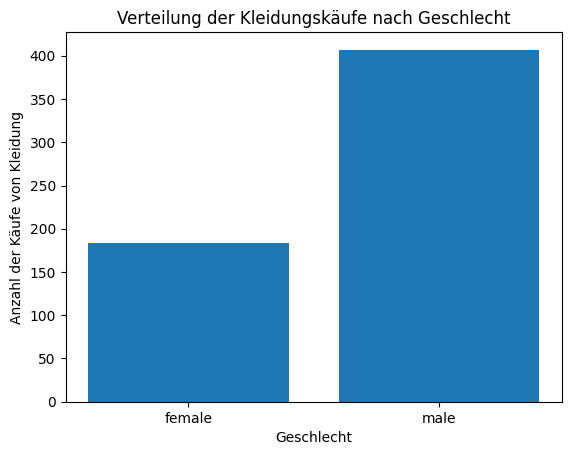

In [77]:
# Gruppierung nach Geschlecht und Zählen der Einkäufe in der Kategorie "Kleidung"
gender_preference = df.groupby('gender')['category'].apply(lambda x: (x == 'clothing').sum())

# Balkendiagramm erstellen
plt.bar(gender_preference.index, gender_preference.values)

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Verteilung der Kleidungskäufe nach Geschlecht")
plt.xlabel("Geschlecht")
plt.ylabel("Anzahl der Käufe von Kleidung")

# Diagramm anzeigen
plt.show()

## es fällt auf, dass Männer mehr kaufen als Frauen

Das Balkendiagramm eignet sich gut, um die Hypothese über die Vorliebe von Frauen für den Kauf von Kleidung zu demonstrieren. Es ermöglicht einen direkten Vergleich der Kaufhäufigkeit zwischen den Geschlechtern auf eine klare und leicht verständliche Weise.

In [78]:
# Test de chi carré pour déterminer l'association entre le sexe et l'achat de vêtements
contingency_table = pd.crosstab(df['gender'], df['category'] == 'clothing')
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Test de Chi carré - p-valeur:", p)

Test de Chi carré - p-valeur: 0.9002074004198064


In [79]:
df.head(2)

,customerID,age,gender,item_purchased,category,purchase_amountUSD,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1.0,55,male,blouse,clothing,53.0,kentucky,L,gray,winter,3.1,yes,express,yes,yes,14,venmo,fortnightly
1,2.0,19,male,sweater,clothing,64.0,maine,L,maroon,winter,3.1,yes,express,yes,yes,2,cash,fortnightly


Männer, die von Aktionsrabatten profitieren, geben tendenziell mehr aus als Kunden, die keine Rabatte erhalten.

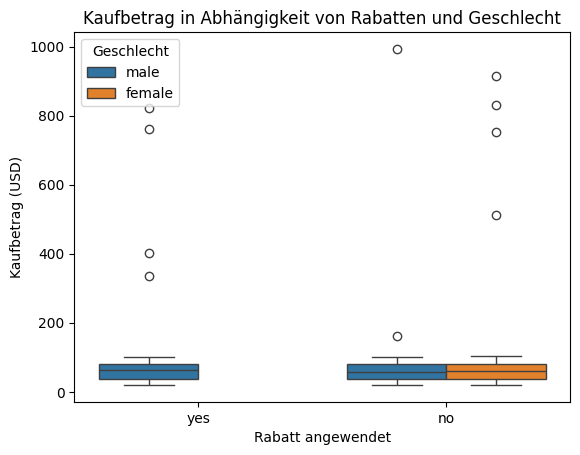

In [81]:
# Boxplot erstellen
sns.boxplot(x='discount_applied', y='purchase_amountUSD', hue='gender', data=df)

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Kaufbetrag in Abhängigkeit von Rabatten und Geschlecht")
plt.xlabel("Rabatt angewendet")
plt.ylabel("Kaufbetrag (USD)")

# Legende hinzufügen
plt.legend(title='Geschlecht')

## Diagramm anzeigen
plt.show()



Ein Boxplot eignet sich gut, um die Hypothese über höhere Ausgaben von Kunden mit angewendeten Rabatten zu demonstrieren, da er eine klare Vergleichsmöglichkeit der Kaufbeträge zwischen Kunden mit und ohne Rabatte bietet und Ausreißer leicht identifiziert werden können.